# Clasificación de señales de tráfico usando TensorFlow y Keras

Instalación de dependencias:

In [ ]:
!pip install tensorflow==2.10 opencv-python matplotlib

In [ ]:
!pip list

In [2]:
import tensorflow as t
import os

import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [4]:
gpus = t.config.experimental.list_physical_devices('GPU')
len(gpus) # 1 -> GPU disponible

1

Funciones sobre imágenes:

In [4]:
data_dir = 'data'

# Mostrar una imagen con matplotlib usando cv2 para corregir los colores
def mostrarImagen(img: cv2.typing.MatLike):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Ejemplo de lectura de imagen
img = cv2.imread(os.path.join(data_dir, 'stop-sign', '1c56eb1de271aaca19a8f081dca6e5eb.jpg'))
mostrarImagen(img)

Carga de las imágenes:
  1. Eliminar imágenes que no tengan un formato comprendido entre los siguientes: JPEG, JPG, BMP, PNG.

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('La imágen no tiene el formato: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            pass

In [48]:
datos = t.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),  # Ajuste de tamaño
    batch_size=32,  # Tamaño de lote de datos
)

Found 356 files belonging to 4 classes.


In [49]:
# Creamos un iterador para recorrer los datos
iterador_datos = datos.as_numpy_iterator()

In [50]:
lote_datos = iterador_datos.next() # Si tenemos error implica que las imágenes tienen formatos incorrectos.

In [ ]:
lote_datos # (imagenes, etiquetas)

In [51]:
# Diccionario de etiquetas
nombre_etiqueta = {
    0: 'Señal Máx. 120Km/h',
    1: 'Señal Máx. 50Km/h',
    2: 'Señal Radar',
    3: 'Señal STOP'

}

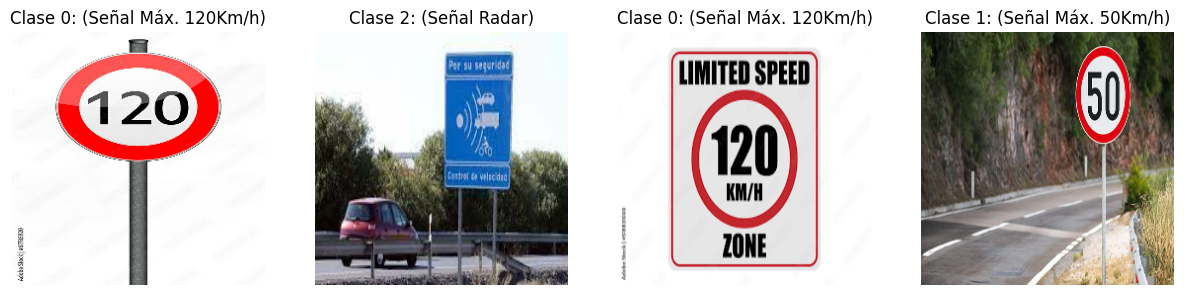

In [52]:
# Mostrar las clases de las imágenes con ejemplo
fig, axs = plt.subplots(1, 4, figsize=(15, 15),sharey=True)
for idx,img in enumerate(lote_datos[0][:4]):
    axs[idx].imshow(img.astype(np.uint8))
    clase = lote_datos[1][idx]
    axs[idx].set_title('Clase {}: ({})'.format(clase,nombre_etiqueta[clase]))
    axs[idx].axis('off')